In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('C:\\Users\\Education\\Downloads\\Voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df.shape

(3168, 21)

In [4]:
print(df.columns)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

# Remove/Handle Null values

In [6]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

# Pie Chart

In [7]:
print(df['label'].value_counts())

male      1584
female    1584
Name: label, dtype: int64


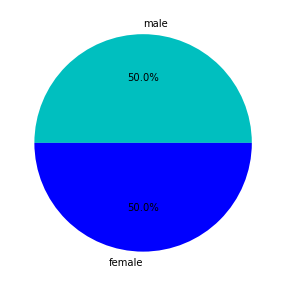

In [8]:
plt.figure(figsize=(5,5))
label = ['male','female']
values = [1584, 1584]
colors = ["c","b"]
plt.pie(values, labels = label, autopct= "%.1f%%",colors =colors)
plt.show()

# Training and Testing data

In [9]:
df['label']= df['label'].replace(['male','female'],[1,0])

In [10]:
df.label

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

In [11]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))
algo_name = []
accuracy_score1 = []

(3168, 20)
(3168,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [12]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


In [16]:
3168*0.20

633.6

## Function for Confusion matrix, classification report, accuracy score

In [17]:
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score

In [18]:
def gen_matrics(ytest, ypred):
    cm = confusion_matrix(ytest, ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest, ypred))
    print('Accuracy Score\n',accuracy_score(ytest, ypred))
    
def tt_score(model):
    print('Trainig Score', model.score(x_train, y_train))
    print('Testing Score', model.score(x_test, y_test))

# 1) Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
m1 = DecisionTreeClassifier(criterion = 'gini', max_depth= 35)
m1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=35)

In [21]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0
 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0
 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0
 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0
 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1
 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0
 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 1 1 1 1 

In [22]:
tt_score(m1)

Trainig Score 1.0
Testing Score 0.9684542586750788


In [23]:
gen_matrics(y_test, ypred_m1)
algo_name.append("Decision Tree")
accuracy_score1.append(m1.score(x_test, y_test))

Confusion Matrix
 [[291  12]
 [  8 323]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       303
           1       0.96      0.98      0.97       331

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Accuracy Score
 0.9684542586750788


# 2)Random Forest Classifier

In [24]:
from sklearn.ensemble  import RandomForestClassifier

In [25]:
m2 = RandomForestClassifier(n_estimators=50, criterion = 'entropy',max_depth=20, min_samples_split=30 )
m2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=30,
                       n_estimators=50)

In [26]:
tt_score(m2)

Trainig Score 0.9881610102604578
Testing Score 0.973186119873817


In [27]:
ypred_m2= m2.predict(x_test)
print(ypred_m2)

[1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1
 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0
 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0
 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0
 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0
 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1
 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0
 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0
 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 1 1 1 1 

In [28]:
gen_matrics(y_test, ypred_m2)
algo_name.append("Random Forest")
accuracy_score1.append(m2.score(x_test, y_test))

Confusion Matrix
 [[294   9]
 [  8 323]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       303
           1       0.97      0.98      0.97       331

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Accuracy Score
 0.973186119873817


# 3)KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
m3 = KNeighborsClassifier(n_neighbors = 30)
m3.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [31]:
tt_score(m3)

Trainig Score 0.7202052091554854
Testing Score 0.6766561514195584


In [32]:
ypred_m3= m3.predict(x_test)
print(ypred_m3)

[1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1
 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0
 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0
 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1
 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0
 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0
 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0
 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1
 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 

In [33]:
gen_matrics(y_test, ypred_m3)
algo_name.append("KNN")
accuracy_score1.append(m3.score(x_test, y_test))

Confusion Matrix
 [[205  98]
 [107 224]]
Classification Report
               precision    recall  f1-score   support

           0       0.66      0.68      0.67       303
           1       0.70      0.68      0.69       331

    accuracy                           0.68       634
   macro avg       0.68      0.68      0.68       634
weighted avg       0.68      0.68      0.68       634

Accuracy Score
 0.6766561514195584


# 4)Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
m4 = LogisticRegression(max_iter = 1000, solver = 'liblinear')
m4.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [36]:
tt_score(m4)

Trainig Score 0.9116022099447514
Testing Score 0.8927444794952681


In [37]:
ypred_m4 = m4.predict(x_test)
print(ypred_m4)

[1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0
 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0
 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0
 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1
 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1
 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0
 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0
 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 1 1 1 1 

In [38]:
gen_matrics(y_test, ypred_m1)
algo_name.append("Logistic Regression")
accuracy_score1.append(m4.score(x_test, y_test))

Confusion Matrix
 [[291  12]
 [  8 323]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       303
           1       0.96      0.98      0.97       331

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Accuracy Score
 0.9684542586750788


# 5)SVM

In [39]:
from sklearn.svm import SVC

In [40]:
m5 = SVC(kernel = 'linear', C=1)
m5.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [41]:
tt_score(m5)

Trainig Score 0.9222573007103394
Testing Score 0.919558359621451


In [42]:
ypred_m5= m5.predict(x_test)
print(ypred_m5)

[1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0
 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0
 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0
 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0
 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 1 1 1 1 

In [43]:
gen_matrics(y_test, ypred_m5)
algo_name.append("SVM")
accuracy_score1.append(m5.score(x_test, y_test))

Confusion Matrix
 [[261  42]
 [  9 322]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       303
           1       0.88      0.97      0.93       331

    accuracy                           0.92       634
   macro avg       0.93      0.92      0.92       634
weighted avg       0.92      0.92      0.92       634

Accuracy Score
 0.919558359621451


Text(0, 0.5, 'Accuracy Score')

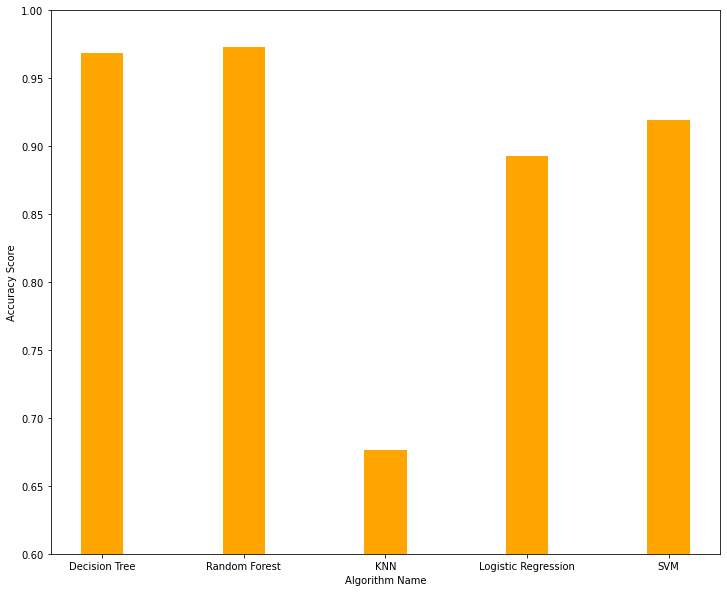

In [45]:
plt.figure(figsize=(12,10))
plt.ylim([0.60,1])
plt.bar(algo_name , accuracy_score1, width=0.3, color=['orange'] )
plt.xlabel('Algorithm Name')
plt.ylabel('Accuracy Score')

# Best Accuracy

## Random Forest has the best accuracy in terms of precision, recall , f-1 score.

## Second-highest: Decision Tree